In [1]:
!install tensorflow

usage: install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 file2
       install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 ... fileN directory
       install -d [-v] [-g group] [-m mode] [-o owner] directory ...


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [18]:
(images_train, labels_train), (images_test, labels_test)  = datasets.cifar10.load_data()
labels = ['airplane', 
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

In [19]:
print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

## Working on a small dataset


In [25]:
#considering 1/10th of the training and testing set
reduction_factor = 10

#choosing random indices of small train and test set
idx_train = np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test = np.random.choice(len(images_test), round(len(images_test)/reduction_factor))

#collecting 2 subsamples from images_train
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]

# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

In [26]:
print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))



------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{0: 503,
 1: 493,
 2: 495,
 3: 517,
 4: 511,
 5: 461,
 6: 522,
 7: 495,
 8: 500,
 9: 503}

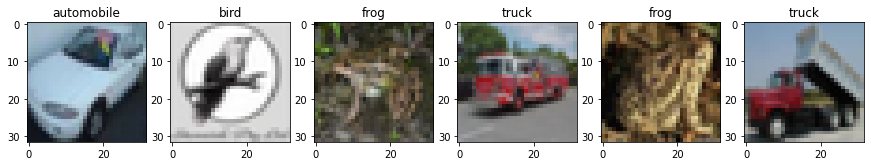

In [28]:
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train_small[i]
    label = labels_train_small[i][0]
    plt.imshow(img)
    plt.title(labels[label])

In [30]:
# Normalizing pixels' intensities
X_train = images_train/255.
X_train_small = images_train_small/255.

X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## Model Building

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

2022-12-03 13:21:18.447905: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-03 13:21:18.452826: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [33]:
model.compile(loss='categorical_crossentropy',
             optimizer ='adam',
             metrics = ['accuracy'])

In [37]:
model.fit(X_train_small, y_train_small, epochs=10, validation_data=(X_test_small, y_test_small))
loss, accuracy = model.evaluate(X_test_small, y_test_small)
print(f'loss: {loss}')
print(f'Accuracy: {accuracy}')

Epoch 1/10
157/157 [==============================] - 2s 15ms/step - loss: 0.8112 - accuracy: 0.7132 - val_loss: 1.3140 - val_accuracy: 0.5790
Epoch 2/10
157/157 [==============================] - 2s 15ms/step - loss: 0.7352 - accuracy: 0.7408 - val_loss: 1.3285 - val_accuracy: 0.5780
Epoch 3/10
157/157 [==============================] - 2s 15ms/step - loss: 0.6715 - accuracy: 0.7636 - val_loss: 1.3518 - val_accuracy: 0.5670
Epoch 4/10
157/157 [==============================] - 2s 15ms/step - loss: 0.6049 - accuracy: 0.7866 - val_loss: 1.3858 - val_accuracy: 0.5610
Epoch 5/10
157/157 [==============================] - 2s 15ms/step - loss: 0.5275 - accuracy: 0.8220 - val_loss: 1.4852 - val_accuracy: 0.5690
Epoch 6/10
157/157 [==============================] - 2s 15ms/step - loss: 0.4347 - accuracy: 0.8568 - val_loss: 1.5562 - val_accuracy: 0.5500
Epoch 7/10
157/157 [==============================] - 2s 15ms/step - loss: 0.3802 - accuracy: 0.8704 - val_loss: 1.6542 - val_accuracy: 0.5570

In [42]:
model.save('img_classifer.model')

2022-12-03 13:48:45.672873: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: img_classifer.model/assets


In [43]:
model = models.load_model('img_classifer.model')

In [46]:
import cv2 as cv

In [73]:
img = cv.imread('img_classifer.model/air_plane.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

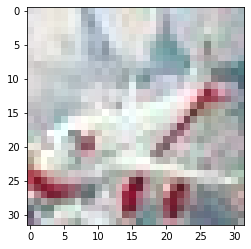

In [74]:
plt.imshow(img, cmap=plt.cm.binary)

In [75]:
prediction = model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'prediction is {labels[index]}')


prediction is airplane
